# K-Means Clustering

Here, we're going to use some synthetic data that we've created to be in three clusters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

x1 = np.random.normal(loc=0.75, size=25)
y1 = np.random.normal(loc=6.0, size=25)
x2 = np.random.normal(loc=4.0, size=25)
y2 = np.random.normal(loc=2.0, size=25)
x3 = np.random.normal(loc=8.0, size=25)
y3 = np.random.normal(loc=6.0, size=25)

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

## Plotting

Let's plot the data to see what it looks like

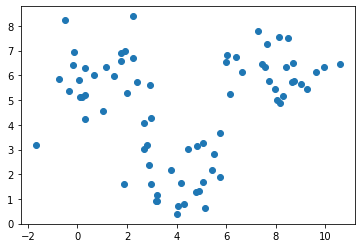

In [2]:
plt.scatter(x, y)

## K-Means Function

Let's write a function that takes x, y and k (the number of clusters) as input. The first step is to randomize the initial centers of the clusters. From there, we enter a loop where we calculate the clusters from the center, and then we calculate the new centers from the clusters.  We repeat this for some number of steps.  Let's add in some plotting after each of the calculating clusters and calculating centers steps.

In [7]:
def kmeans(x,y,k, iters=5):
    centers = []
    for i in range(k):
        cx = np.min(x)+np.random.random()*(np.max(x)-np.min(x))
        cy = np.min(y)+np.random.random()*(np.max(y)-np.min(y))
        centers.append([cx,cy])
    plt.figure()
    plt.scatter(x,y)
    a = np.array(centers)
    plt.scatter(a[:,0], a[:,1], marker="*", color="r")
    plt.title("First Guess on Centers")

    for n in range(iters):
        clusters = []
        for i in range(len(x)):
            min_d = 1000
            for j in range(k):
                d = np.sqrt((x[i]-centers[j][0])**2+(y[i]-centers[j][1])**2)
                if (d < min_d):
                    cluster = j
                    min_d = d
            clusters.append(cluster)
       
        plt.figure()
        plt.scatter(x,y, c=clusters)
        a = np.array(centers)
        plt.scatter(a[:,0], a[:,1], marker="*", color="r")
        plt.title("Updating clusters in iteration " + str(n))
        
        centers = []
        for i in range(k):
            all_x = []
            all_y = []
            for j in range(len(x)):
                if (clusters[j] == i):
                    all_x.append(x[j])
                    all_y.append(y[j])
            centers.append([np.mean(all_x), np.mean(all_y)])
    
        plt.figure()
        plt.scatter(x,y, c=clusters)
        a = np.array(centers)
        plt.scatter(a[:,0], a[:,1], marker="*", color="r")
        plt.title("Updating centers in iteration " + str(n))
    
    return clusters, centers
                

## Running K-Means

Let's now run it for different numbers of centers (starting with 3). 

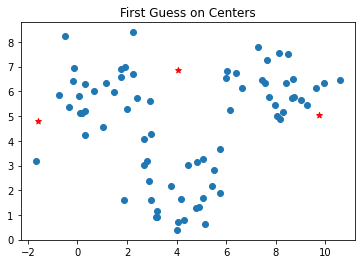

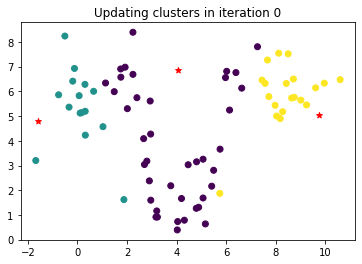

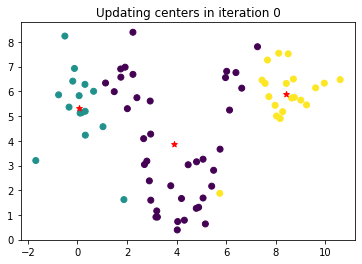

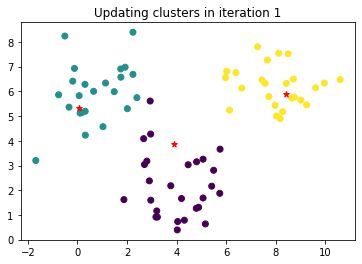

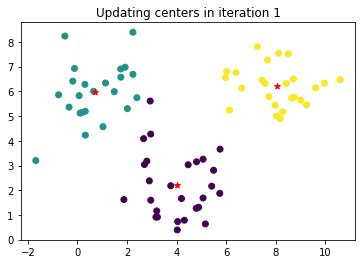

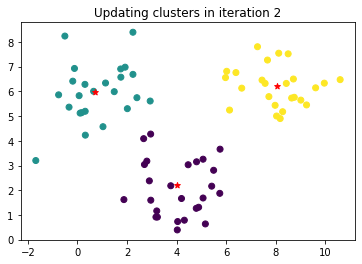

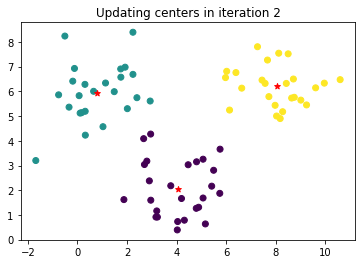

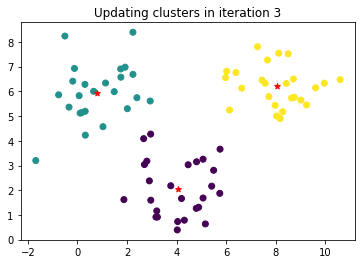

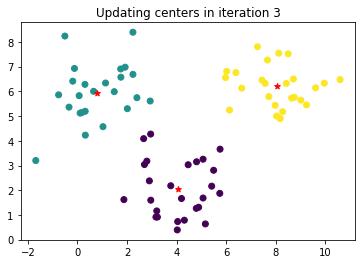

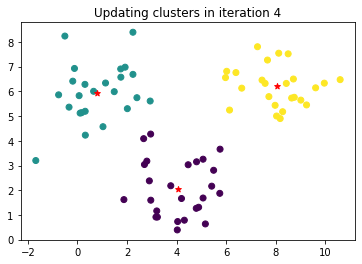

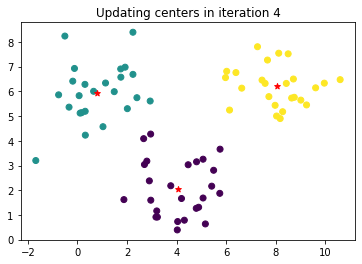

In [8]:
clusters, centers = kmeans(x,y,3)